In [1]:
%load_ext autoreload

%autoreload 2

In [1]:
import numpy as np
import torch
import torchvision
import tqdm
from torch import nn
from torchvision import transforms as T
from torch.utils.data import DataLoader
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import random

In [2]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [3]:
from torchvision.datasets import CIFAR10

In [4]:
train_transform = T.Compose([
    T.RandomCrop((32, 32), padding=4),
    T.RandomHorizontalFlip(0.5),
    T.ColorJitter(contrast=0.25),
    T.ToTensor(),
    T.Normalize(mean=(0.4914, 0.4822, 0.4465), std=(0.247, 0.243, 0.261)),
])
val_transform = T.Compose([
    T.ToTensor(),
    T.Normalize(mean=(0.4914, 0.4822, 0.4465), std=(0.247, 0.243, 0.261)),
])

train_dataset = CIFAR10("./data/", download=True, train=True, transform=train_transform)
val_dataset = CIFAR10("./data/", download=True, train=False, transform=val_transform)

Files already downloaded and verified
Files already downloaded and verified


In [5]:
train_dataloader = DataLoader(train_dataset, batch_size=100, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=100)

In [6]:
from src.utils import set_random_seed

In [7]:
from src.utils import train, predict

In [8]:
from src.layers.ht import HT

set_random_seed(12345)
model = nn.Sequential(
    nn.Sequential(
        nn.Conv2d(3, 64, (3, 3), padding="same"),
        nn.BatchNorm2d(64),
        nn.ReLU(),
    ),
    nn.Sequential(
        nn.Conv2d(64, 64, (3, 3), padding="same"),
        nn.BatchNorm2d(64),
        nn.ReLU(),
    ),
    nn.MaxPool2d((3, 3), stride=(2, 2), padding=(1, 1)),
    nn.Sequential(
        nn.Conv2d(64, 128, (3, 3), padding="same"),
        nn.BatchNorm2d(128),
        nn.ReLU(),
    ),
    nn.Sequential(
        nn.Conv2d(128, 128, (3, 3), padding="same"),
        nn.BatchNorm2d(128),
        nn.ReLU(),
    ),
    nn.MaxPool2d((3, 3), stride=(2, 2), padding=(1, 1)),
    nn.Sequential(
        nn.Conv2d(128, 128, (3, 3), padding="same"),
        nn.BatchNorm2d(128),
        nn.ReLU(),
    ),
    nn.Sequential(
        nn.Conv2d(128, 128, (3, 3), padding="same"),
        nn.BatchNorm2d(128),
        nn.ReLU(),
    ),
    nn.Sequential(
        nn.Flatten(),
        HT((2, 2, 2, 4, 4, 4, 4, 4), (2, 2, 2, 2, 2, 2, 2, 4), 3),
        nn.BatchNorm1d(512),
        nn.ReLU(),
        nn.Linear(512, 10),
    )
)

optimizer = torch.optim.SGD(model.parameters(), lr=1e-1, momentum=0.9)
criterion = nn.CrossEntropyLoss(reduction="mean")
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, 30, gamma=0.1, verbose=True)
# scheduler = None
n_epochs = 100

device = "cuda:0" if torch.cuda.is_available() else torch.device("cpu")
model = model.to(device)
# device = "cpu"

Adjusting learning rate of group 0 to 1.0000e-01.


In [9]:
all_losses, predicted_labels, true_labels = predict(model, val_dataloader, criterion, device)
assert len(predicted_labels) == len(val_dataset)
accuracy = accuracy_score(predicted_labels.to("cpu"), true_labels.to("cpu"))
print("tests passed")

tests passed


  0%|          | 0/500 [00:00<?, ?it/s]

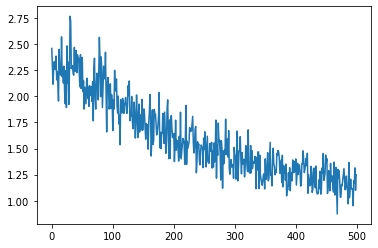

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch: 0, Train loss: 1.5995703929662703, Validation loss: 1.111749529838562, Validation accuracy: 0.6044


  0%|          | 0/500 [00:00<?, ?it/s]

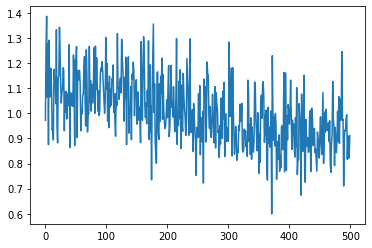

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch: 1, Train loss: 1.0051278927326202, Validation loss: 0.8908334970474243, Validation accuracy: 0.6926


  0%|          | 0/500 [00:00<?, ?it/s]

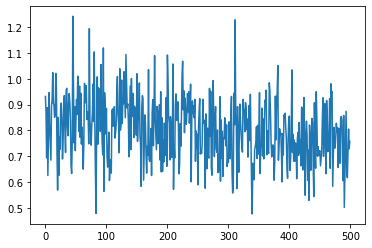

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch: 2, Train loss: 0.8027534360289573, Validation loss: 0.7434336543083191, Validation accuracy: 0.7424


  0%|          | 0/500 [00:00<?, ?it/s]

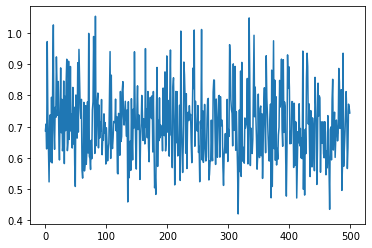

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch: 3, Train loss: 0.7056664137840271, Validation loss: 0.8172516822814941, Validation accuracy: 0.7337


  0%|          | 0/500 [00:00<?, ?it/s]

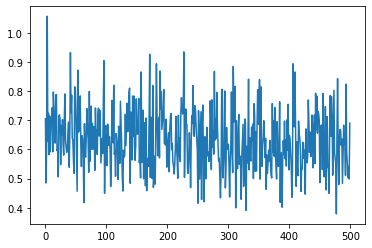

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch: 4, Train loss: 0.6335739448666573, Validation loss: 0.6646969318389893, Validation accuracy: 0.7738


  0%|          | 0/500 [00:00<?, ?it/s]

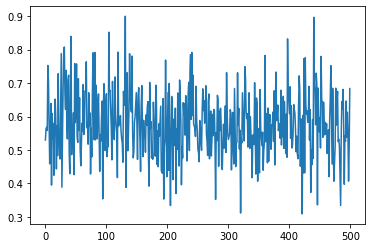

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch: 5, Train loss: 0.5772181884050369, Validation loss: 0.5788998603820801, Validation accuracy: 0.8042


  0%|          | 0/500 [00:00<?, ?it/s]

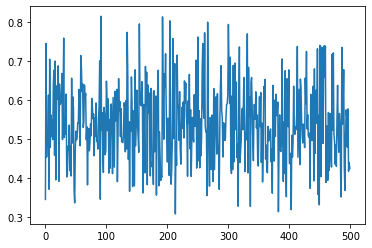

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch: 6, Train loss: 0.5402154556512833, Validation loss: 0.6048155426979065, Validation accuracy: 0.7957


  0%|          | 0/500 [00:00<?, ?it/s]

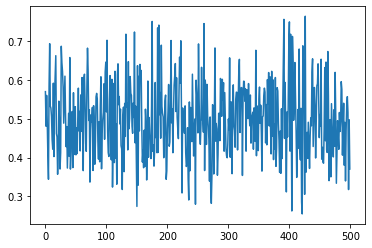

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch: 7, Train loss: 0.49937142646312715, Validation loss: 0.524683952331543, Validation accuracy: 0.83


  0%|          | 0/500 [00:00<?, ?it/s]

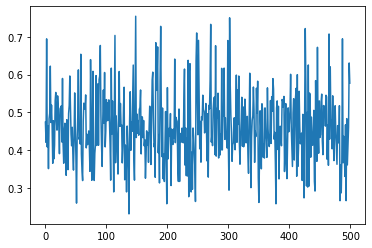

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch: 8, Train loss: 0.4617638090848923, Validation loss: 0.5071457028388977, Validation accuracy: 0.8302


  0%|          | 0/500 [00:00<?, ?it/s]

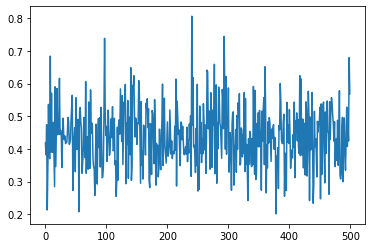

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch: 9, Train loss: 0.4386447066664696, Validation loss: 0.4668574035167694, Validation accuracy: 0.8405


  0%|          | 0/500 [00:00<?, ?it/s]

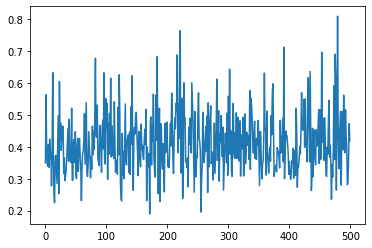

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch: 10, Train loss: 0.4128134676814079, Validation loss: 0.5098085999488831, Validation accuracy: 0.8252


  0%|          | 0/500 [00:00<?, ?it/s]

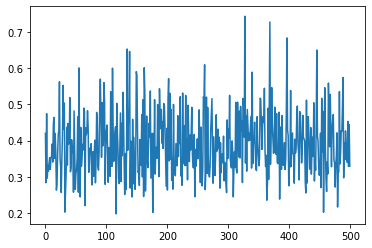

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch: 11, Train loss: 0.39028392004966733, Validation loss: 0.5538352727890015, Validation accuracy: 0.8176


  0%|          | 0/500 [00:00<?, ?it/s]

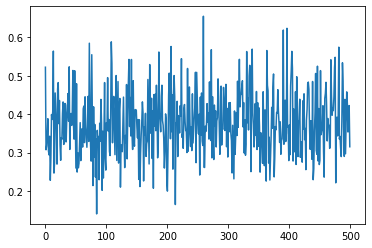

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch: 12, Train loss: 0.3771709725856781, Validation loss: 0.46180495619773865, Validation accuracy: 0.8478


  0%|          | 0/500 [00:00<?, ?it/s]

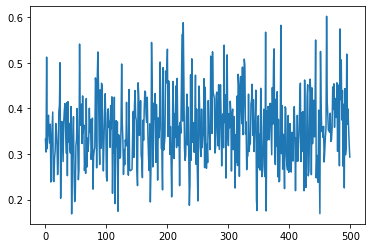

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch: 13, Train loss: 0.3542106167376041, Validation loss: 0.4335237741470337, Validation accuracy: 0.8618


  0%|          | 0/500 [00:00<?, ?it/s]

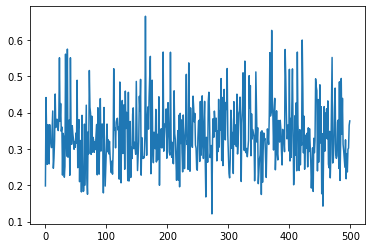

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch: 14, Train loss: 0.33866720023751257, Validation loss: 0.43587493896484375, Validation accuracy: 0.8617


  0%|          | 0/500 [00:00<?, ?it/s]

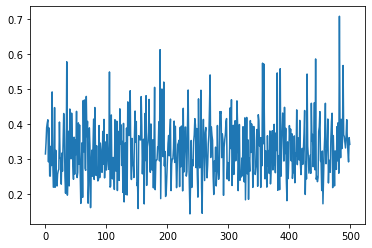

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch: 15, Train loss: 0.325292739957571, Validation loss: 0.42781302332878113, Validation accuracy: 0.8621


  0%|          | 0/500 [00:00<?, ?it/s]

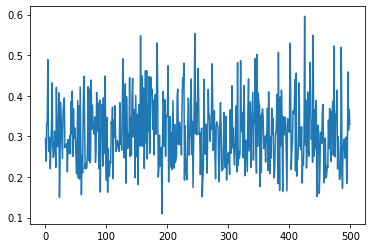

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch: 16, Train loss: 0.30938980704545976, Validation loss: 0.4186253249645233, Validation accuracy: 0.8691


  0%|          | 0/500 [00:00<?, ?it/s]

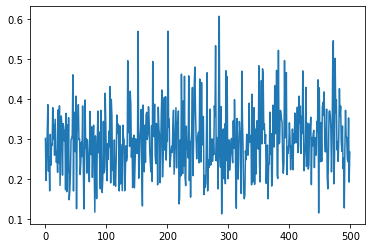

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch: 17, Train loss: 0.29463445891439916, Validation loss: 0.4827110171318054, Validation accuracy: 0.8479


  0%|          | 0/500 [00:00<?, ?it/s]

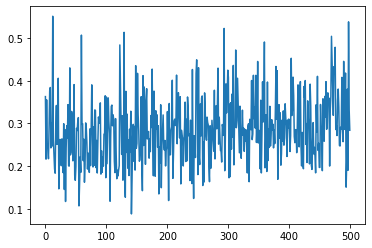

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch: 18, Train loss: 0.28357870794832707, Validation loss: 0.46007975935935974, Validation accuracy: 0.8549


  0%|          | 0/500 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [10]:
accuracies = train(model, train_dataloader, val_dataloader, criterion, optimizer, device, n_epochs, scheduler, plot=True)

Accuracy: 0.9064


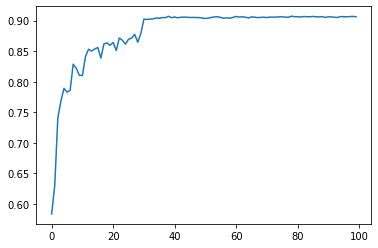

In [27]:
all_losses, predicted_labels, true_labels = predict(model, val_dataloader, criterion, device)
assert len(predicted_labels) == len(val_dataset)
accuracy = accuracy_score(true_labels.to("cpu"), predicted_labels.to("cpu"))
print(f"Accuracy: {accuracy}")
plt.plot(accuracies)
plt.show()